# Unifying `F15A`data

In [1]:
cd ~/Desktop/Tesis/Notebooks-Git

/home/luis/Desktop/Tesis/Notebooks-Git


In [2]:
import Script as sc

In [3]:
cd ~/Desktop/Tesis/F15A

/home/luis/Desktop/Tesis/F15A


In [4]:
import os
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')

In [5]:
logs = os.listdir()
logs = [s for s in logs if ".LAS" in s]
logs.sort()
logs

['WL_RAW_BHPR-GR-MECH_TIME_MWD_1.LAS',
 'WL_RAW_BHPR-GR-MECH_TIME_MWD_2.LAS',
 'WL_RAW_BHPR-GR-MECH_TIME_MWD_3.LAS']

In [6]:
i = 2
for las in logs:
    print("\nRun_"+str(i))
    sc.logs_LAS(las)
    i+=1


Run_2
File: WL_RAW_BHPR-GR-MECH_TIME_MWD_1.LAS
TIME	    .HHMMSS	       :
DATE	    .D		       :
DEPT        .M                 : Bit Depth 2hz
ROP5        .M/HR              : 5ft ROP 2hz
ARC_GR_UNC_RT.GAPI              : ARC Raw Gamma Ray, Real-Time
BPOS        .M                 : Block Position 2hz
BVEL        .M/S               : Block Velocity 2hz
SWOB        .KKGF              : Surface Weight on Bit 2hz
TQA         .KMN               : SRF STOR 2hz
RPM         .RPM               : SRF SRPM 2hz
CRPM_RT     .RPM               : MWD CRPM 2hz
Stick_RT    .RPM               : MWD PKtoPK RPM 2hz
TFLO        .LPM               : HSPM Total Pump Flow 2hz
TRPM_RT     .RPM               : MWD TUR_RPM 2hz
SPPA        .BAR               : SRF PUMPRS 2hz
SHKRSK_RT   .----              : MWD SHKRSK 2hz
SHKPK_RT    .G                 : MWD SHK_PK 2hz
ECD_ARC     .G/C3              : Equivalent Circulating Density
APRS_ARC    .BAR               : ARC Annular Pressure
ATMP        .DEGC          

In [8]:
cd ~/Desktop/Tesis/F15A/CSVs

/home/luis/Desktop/Tesis/F15A/CSVs


In [22]:
files = os.listdir()
#files.sort()
files = ['run_7.csv', 'run_9.csv', 'run_10.csv']

In [23]:
dfs = []
for elements in files:
    df = pd.read_csv(elements)
    dfs.append(df)

In [24]:
run_7 = dfs[0]
run_9 = dfs[1]
run_10 = dfs[2]

In [25]:
runs = [run_7,run_9,run_10]
runs_txt = ["run_7","run_9","run_10"]
sections  =  ['17 1/2"','8 1/2"','8 1/2"']
info = list(zip(runs_txt,sections))
info

[('run_7', '17 1/2"'), ('run_9', '8 1/2"'), ('run_10', '8 1/2"')]

## Log standarization

Logs that are constant through the BHA
* BPOS 
* BVEL
* DateTime
* ROP5
* SWOB
* HKLD
* TQA
* RPM
* Stick_RT
* TFLO
* SPPA
* SHKPK_RT
* SHKRSK_RT 
* GMRAy

In [26]:
i = 0 
for run in runs:
    print("\n",runs_txt[i])
    run.drop(["TRPM_RT","Flag","BONB","HDTH"],inplace=True,axis=1)
    print("Logs:\n",np.sort(run.columns.values))
    i+=1
    


 run_7
Logs:
 ['APRS_ARC' 'ARC_GR_UNC_RT' 'ATMP' 'BPOS' 'BVEL' 'CRPM_RT' 'DEPT'
 'DateTime' 'ECD_ARC' 'HKLD' 'ROP5' 'RPM' 'Run' 'SHKPK_RT' 'SHKRSK_RT'
 'SPPA' 'SWOB' 'Stick_RT' 'TFLO' 'TQA' 'Well']

 run_9
Logs:
 ['BPOS' 'BVEL' 'CRPM_RT' 'DEPT' 'DHAP' 'DHAT' 'DateTime' 'ECD'
 'GRMA_BHC_RT' 'HKLD' 'ROP5' 'RPM' 'Run' 'SHKL_DH_ECO_RT' 'SHKPK_RT'
 'SHKRSK_RT' 'SPPA' 'SWOB' 'Stick_RT' 'TFLO' 'TQA' 'Well']

 run_10
Logs:
 ['BPOS' 'BVEL' 'CRPM_RT' 'DEPT' 'DHAP' 'DHAT' 'DateTime' 'ECD'
 'GRMA_BHC_RT' 'HKLD' 'ROP5' 'RPM' 'Run' 'SHKL_DH_ECO_RT' 'SHKPK_RT'
 'SHKRSK_RT' 'SPPA' 'SWOB' 'Stick_RT' 'TFLO' 'TQA' 'Well']


In [27]:
runs[0].drop(['SHKPK_RT','CRPM_RT','APRS_ARC','SHKRSK_RT',"ATMP"],axis=1,inplace=True)
runs[1].drop([ 'SHKL_DH_ECO_RT','SHKPK_RT','DHAP','DHAT','SHKRSK_RT','CRPM_RT'],axis=1,inplace=True)
runs[2].drop(['CRPM_RT','DHAP','DHAT','SHKL_DH_ECO_RT','SHKPK_RT','SHKRSK_RT'],axis=1,inplace=True)

In [28]:
i = 0 
for run in runs:
    print("\n",runs_txt[i])
    print("Logs:\n",np.sort(run.columns.values))
    i+=1


 run_7
Logs:
 ['ARC_GR_UNC_RT' 'BPOS' 'BVEL' 'DEPT' 'DateTime' 'ECD_ARC' 'HKLD' 'ROP5'
 'RPM' 'Run' 'SPPA' 'SWOB' 'Stick_RT' 'TFLO' 'TQA' 'Well']

 run_9
Logs:
 ['BPOS' 'BVEL' 'DEPT' 'DateTime' 'ECD' 'GRMA_BHC_RT' 'HKLD' 'ROP5' 'RPM'
 'Run' 'SPPA' 'SWOB' 'Stick_RT' 'TFLO' 'TQA' 'Well']

 run_10
Logs:
 ['BPOS' 'BVEL' 'DEPT' 'DateTime' 'ECD' 'GRMA_BHC_RT' 'HKLD' 'ROP5' 'RPM'
 'Run' 'SPPA' 'SWOB' 'Stick_RT' 'TFLO' 'TQA' 'Well']


In [29]:
runs[0].rename({'ARC_GR_UNC_RT':"GR","ECD_ARC":"ECD"},axis=1,inplace=True)
runs[1].rename({'GRMA_BHC_RT':'GR'},axis=1,inplace=True)
runs[2].rename({'GRMA_BHC_RT':"GR"},axis=1,inplace=True)

In [30]:
for run in runs:
    cols = ['BPOS', 'BVEL', 'DEPT',"ECD",'DateTime','GR', 'HKLD', 'ROP5','RPM', 'Run', 'SPPA', 'SWOB', 'Stick_RT','TFLO', 'TQA', 'Well']
    run = run.reindex(columns=cols)

In [31]:
i = 0 
for run in runs:
    print("\n",runs_txt[i])
    print("Logs:\n",np.sort(run.columns.values))
    i+=1


 run_7
Logs:
 ['BPOS' 'BVEL' 'DEPT' 'DateTime' 'ECD' 'GR' 'HKLD' 'ROP5' 'RPM' 'Run'
 'SPPA' 'SWOB' 'Stick_RT' 'TFLO' 'TQA' 'Well']

 run_9
Logs:
 ['BPOS' 'BVEL' 'DEPT' 'DateTime' 'ECD' 'GR' 'HKLD' 'ROP5' 'RPM' 'Run'
 'SPPA' 'SWOB' 'Stick_RT' 'TFLO' 'TQA' 'Well']

 run_10
Logs:
 ['BPOS' 'BVEL' 'DEPT' 'DateTime' 'ECD' 'GR' 'HKLD' 'ROP5' 'RPM' 'Run'
 'SPPA' 'SWOB' 'Stick_RT' 'TFLO' 'TQA' 'Well']


Gamma Ray


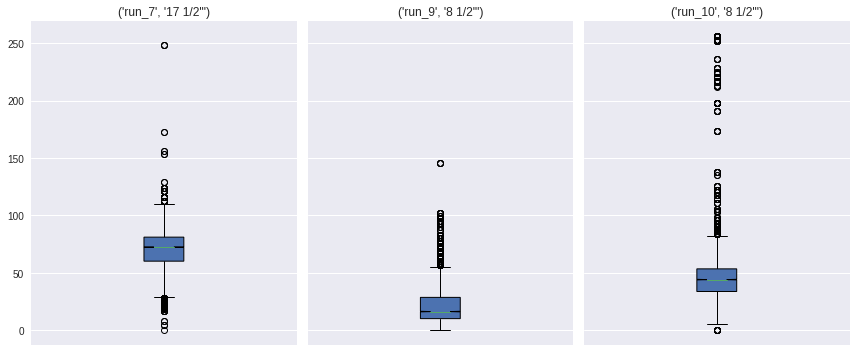

In [32]:
sc.boxplt_logs(runs,"GR","Gamma Ray",info)

In [33]:
cols = runs[0].columns.difference(["DateTime","Run","Well"])

In [34]:
cols

Index(['BPOS', 'BVEL', 'DEPT', 'ECD', 'GR', 'HKLD', 'ROP5', 'RPM', 'SPPA',
       'SWOB', 'Stick_RT', 'TFLO', 'TQA'],
      dtype='object')

BPOS


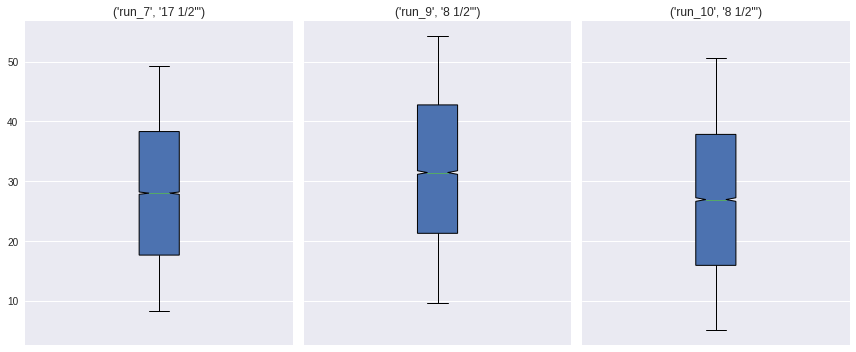

BVEL


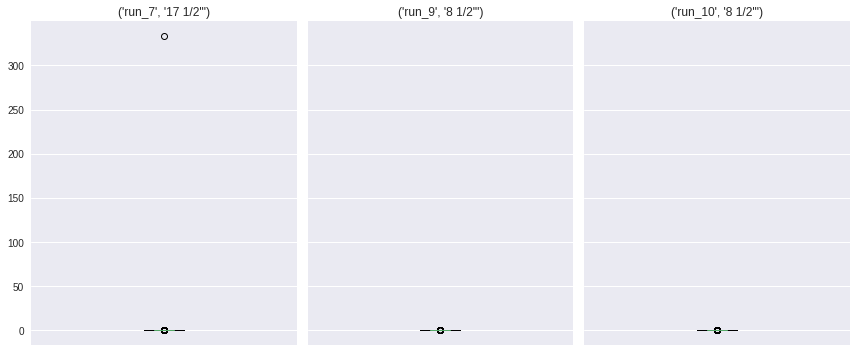

DEPT


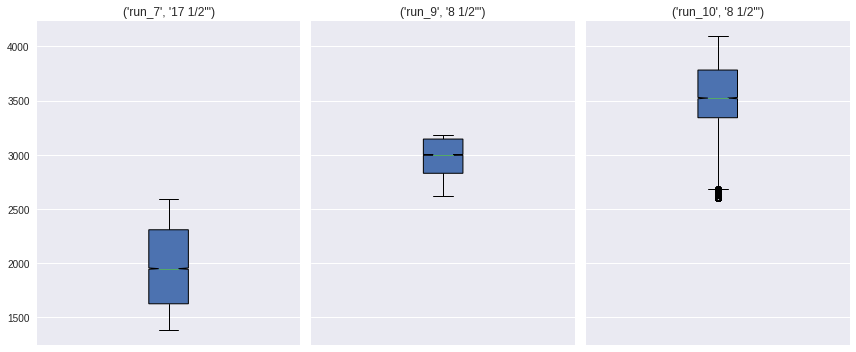

ECD


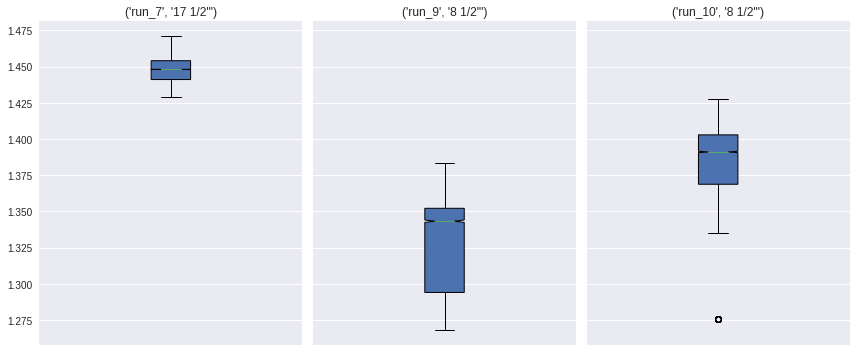

GR


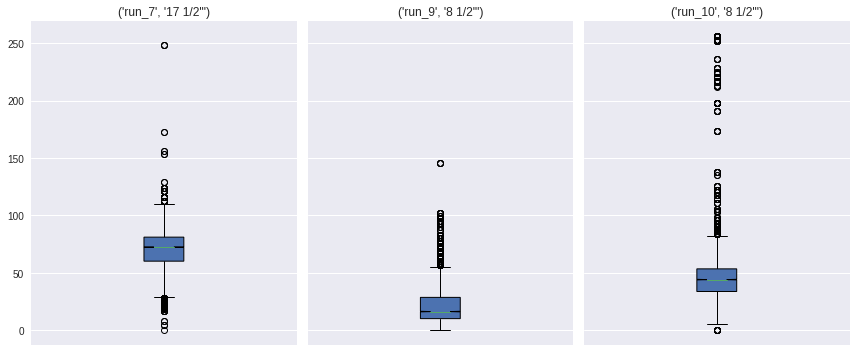

HKLD


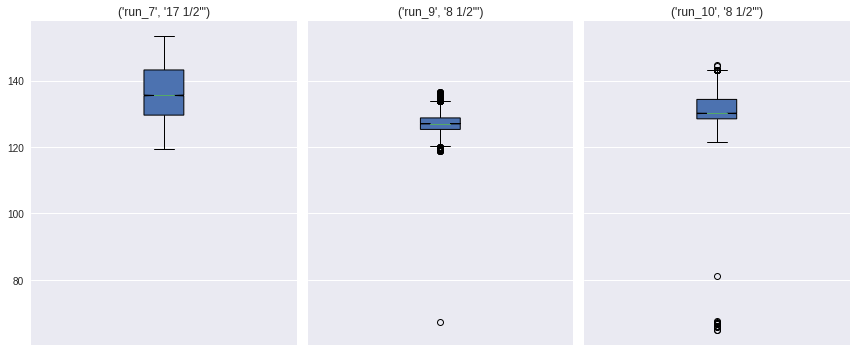

ROP5


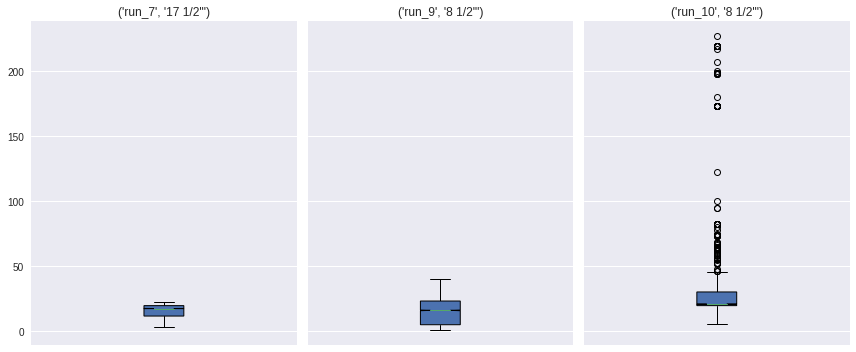

RPM


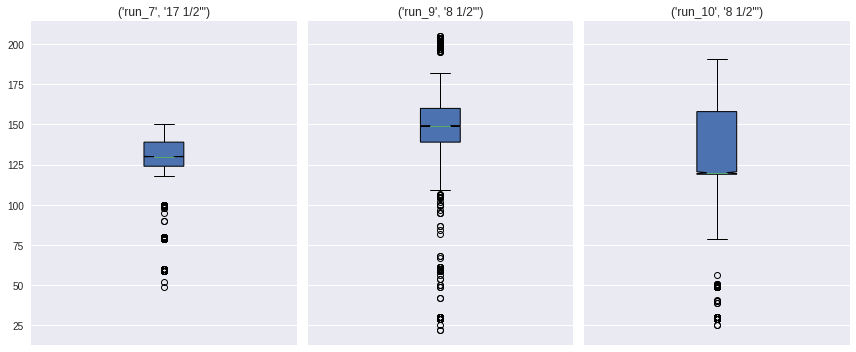

SPPA


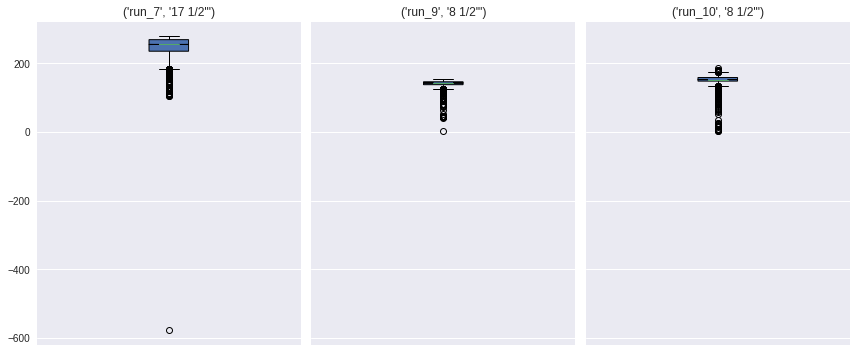

SWOB


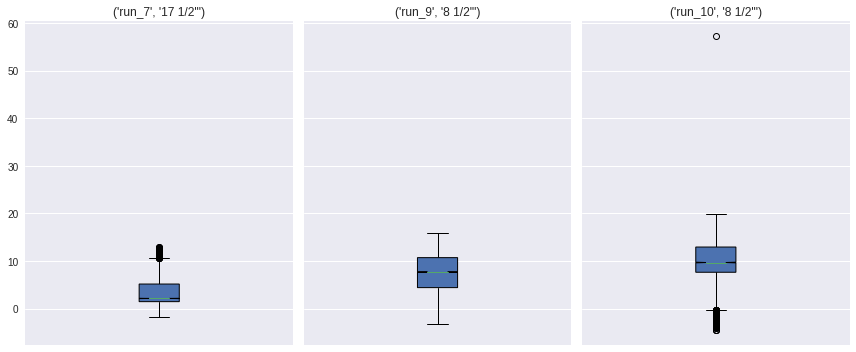

Stick_RT


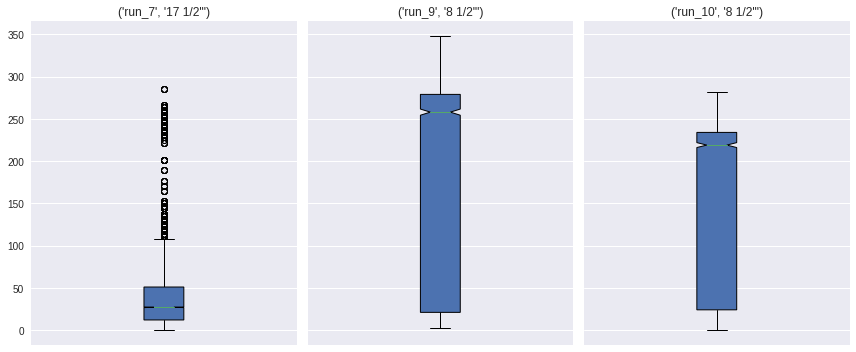

TFLO


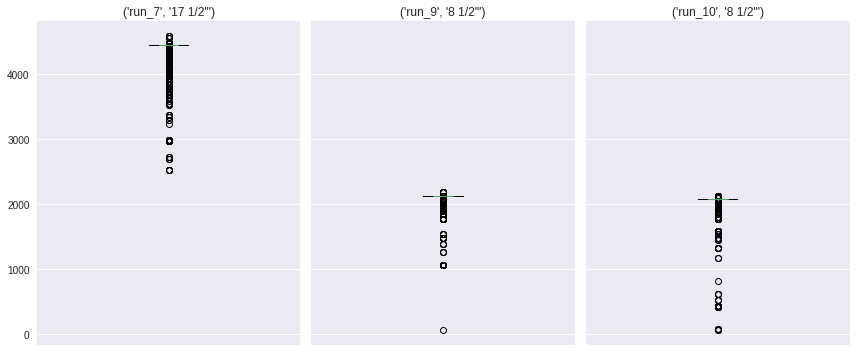

TQA


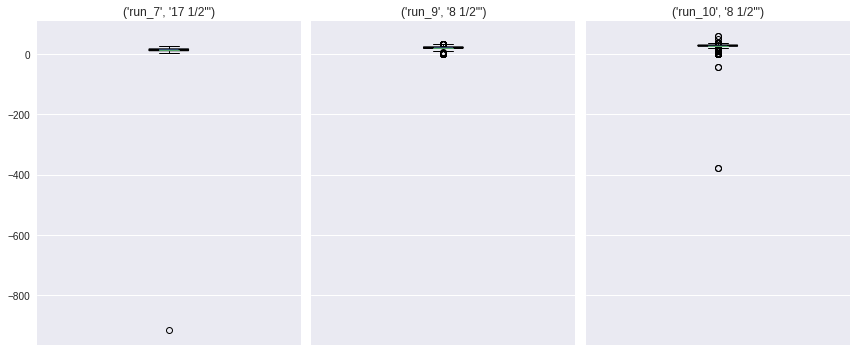

In [35]:
i = 0
for log in cols:
    sc.boxplt_logs(runs,cols[i],cols[i],info)
    i+=1

## Concatenating

In [36]:
df = pd.concat(runs)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54585 entries, 0 to 13060
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   DEPT      54585 non-null  float64
 1   ROP5      54148 non-null  float64
 2   GR        54275 non-null  float64
 3   BPOS      54585 non-null  float64
 4   BVEL      54585 non-null  float64
 5   SWOB      54585 non-null  float64
 6   TQA       54585 non-null  float64
 7   RPM       54585 non-null  float64
 8   Stick_RT  53866 non-null  float64
 9   TFLO      54585 non-null  float64
 10  SPPA      54566 non-null  float64
 11  ECD       54585 non-null  float64
 12  HKLD      54585 non-null  float64
 13  DateTime  54585 non-null  object 
 14  Well      54585 non-null  object 
 15  Run       54585 non-null  object 
dtypes: float64(13), object(3)
memory usage: 7.1+ MB


In [38]:
df["DateTime"] = pd.to_datetime(df["DateTime"])
cols = df.columns.difference(["Run","Well"])
plt_df = pd.DataFrame(df,columns = cols)

In [39]:
plt_df

BPOS    BVEL       DEPT            DateTime     ECD       GR  \
0      25.0130  0.0010  1381.0034 2008-12-11 15:01:37  1.4310  36.0000   
1      25.0000  0.0010  1381.0164 2008-12-11 15:01:47  1.4310  36.0000   
2      24.9830  0.0010  1381.0339 2008-12-11 15:01:57  1.4320  43.8910   
3      24.9700  0.0010  1381.0464 2008-12-11 15:02:07  1.4310  43.8910   
4      24.9570  0.0010  1381.0597 2008-12-11 15:02:17  1.4310  43.8910   
...        ...     ...        ...                 ...     ...      ...   
13056  17.9498  0.0000  4095.3297 2009-01-04 18:27:27  1.4236  72.0583   
13057  17.9495  0.0000  4095.3300 2009-01-04 18:27:37  1.4225  72.0583   
13058  17.9495  0.0000  4095.3300 2009-01-04 18:27:47  1.4195  95.9469   
13059  18.0616 -0.0006  4095.2178 2009-01-04 18:27:57  1.4221  95.9469   
13060  18.0612  0.0000  4095.2181 2009-01-04 18:28:07  1.4180  95.9469   

           HKLD     ROP5    RPM      SPPA     SWOB  Stick_RT       TFLO  \
0      124.2190   3.4940   80.0  188.0610   0.6240      57.0  4010.0120   
1      124.2390   3.4940   80.0  188.0610   0.6040      57.0  4010.0120   
2      124.2510   3.4940   80.0  188.8070   0.5920      12.0  4010.0120   
3      124.1590   3.4940   80.0  188.7640   0.6850      12.0  4010.0120   
4      124.2940   3.9790   80.0  188.7820   0.5490      12.0  4010.0120   
...         ...      ...    ...       ...      ...       ...        ...   
13056  140.6733  37.6749  160.0  166.1446  12.4974      12.0  2077.1803   
13057  140.8168  37.6749  159.0  165.6381  12.3539      12.0  2077.1803   
13058  141.0738  37.6749  144.0  165.1037  12.0969      12.0  2077.1803   
13059  142.2672  37.6749   80.0  166.5956  10.9034      12.0  2077.1803   
13060  142.0562  37.6749   80.0  166.5956  11.1145      12.0  2077.1803   

           TQA  
0       7.5400  
1       7.5400  
2       6.9700  
3       7.0620  
4       7.7870  
...        ...  
13056  25.7284  
13057  26.0694  
13058  24.8705  
13059  22.8788  
13060  22.8788  

[54585 rows x 14 columns]

Plot: Whole 	Section: Whole


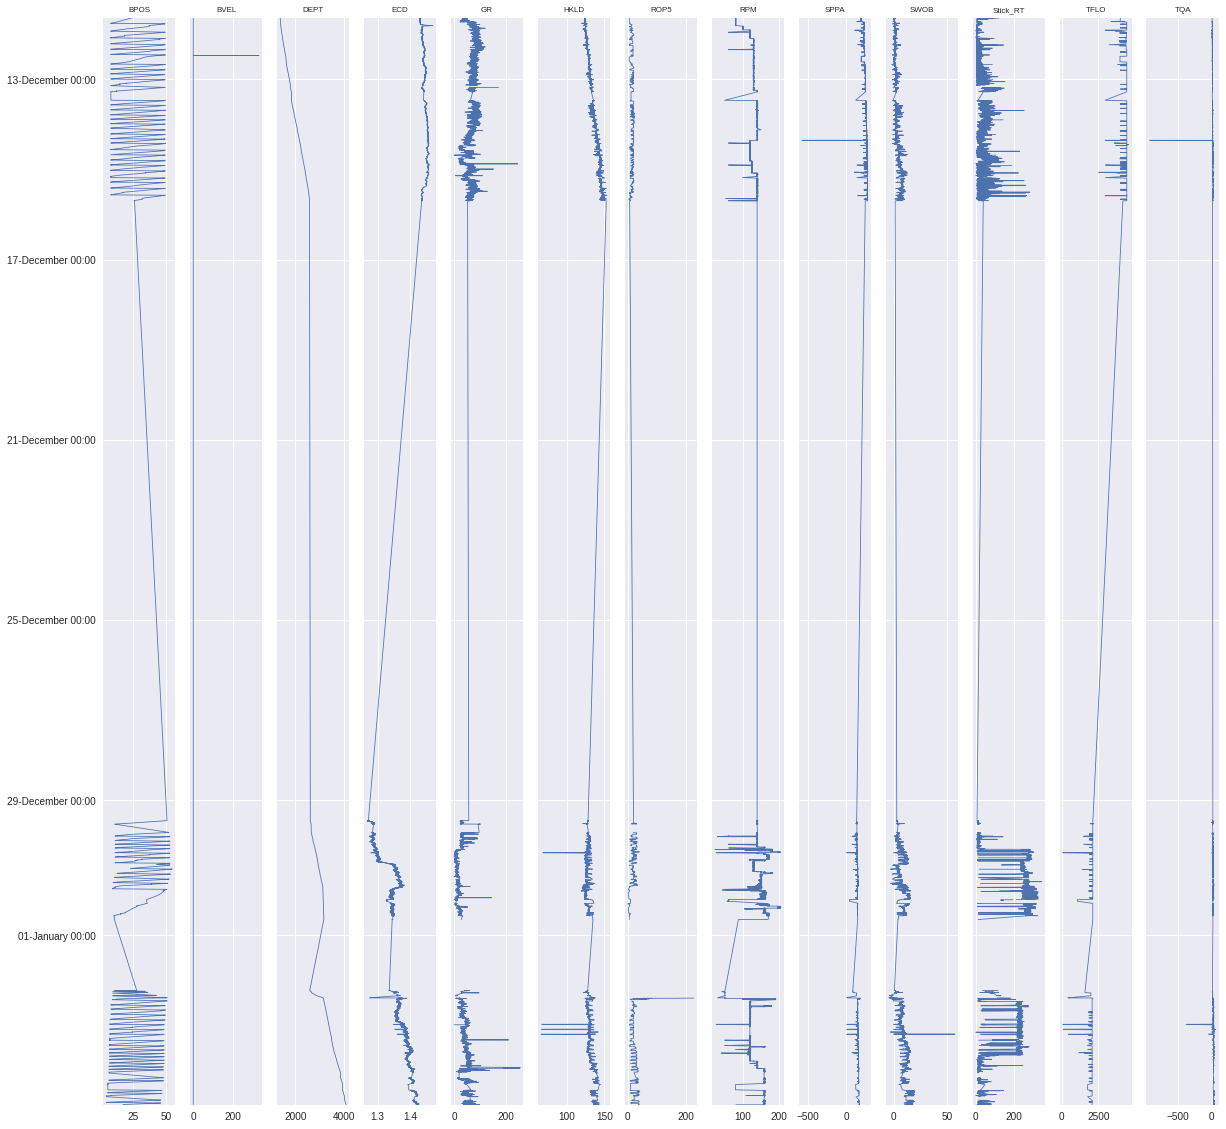




CPU times: user 5.7 s, sys: 83 ms, total: 5.79 s
Wall time: 6 s


In [40]:
%%time
sc.well_plt(plt_df,["Whole","Whole"])

In [41]:
df.to_csv(r"WellboreF15A.csv",index=False)